Se inicia declarando loas librerias a usar durante el programa

In [1]:
from pylab import*
from numpy import*
from math import*
from scipy import*
from mpl_toolkits.mplot3d.axes3d import Axes3D
from JSAnimation import IPython_display
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
%matplotlib inline

Ahora se definen algunas funciones útiles para la operación entre vectores

In [2]:
#  UNITARIO(R) : calcula y regresa el vector unitario de 'R'. 
def unitario(r):
    mag=sqrt(r[0]**2+r[1]**2+r[2]**2)
    v=r/mag
    return v

# PRODPTO(A,B) : calcula y regresa el producto punto entre 'A' y 'B'.
def prodpto(a,b):
    p=a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
    return p

#   PRODCRUZ : calcula y regresa el producto cruz entre 'A' y 'B'.
def prodcruz(a,b):
    p=[a[1]*b[2]-a[2]*b[1], a[2]*b[0]-a[0]*b[2], a[0]*b[1]-a[1]*b[0]]
    return p    

A continuación se crea un perfil 3-D del contorno del trompo. Se parte de la idea de que un trompo tiene una linea recta base (de giro o simetría) sobre la cual giran todos los puntos del trompo. La técnica con que se proyecta ésta línea recta en un espacio 3-D, es mediante un punto en la línea $\vec{b}$ (que en nuestro caso será el punto inferior del trompo, es decir, el punto en contacto con la superficie) y un vector unitario $\vec{a}$ (que para fines prácticos sea unitario) que apunta en la misma dirección que la recta, por tanto, la ecuación de la línea recta es:

$$\vec{r}(t)=\vec{b}+t\ \vec{a}$$

donde $t$ representa la extensión (largo) de la recta (que en nuestro programa valdrá $20$).

Habiendo creado dicha línea recta, procedemos a generar los puntos que darán forma a nuestro trompo. Para esto, partimos la recta en $11$ pedazos, es decir, consideraremos $11$ puntos sobre la recta que serviran de base para proyectar los puntos de la superficie del trompo. Posteriormente, y con ayuda del vector $\vec{a}$ calculamos un vector perpendicular al vector $\vec{a}$. Dado que hay una cantidad infinita de vectores perpendiculares a $\vec{a}$, proyectamos un vector (al cual llamaremos $msh$) contenido en el plano $yz$ de modo que su componente $x$ vale cero. Posteriormente hacemos que su componente en $y$ valga $1$, y en base al producto punto entre vectores, del cual sabemos que dos vectores son ortogonales si dicho producto vale cero, tenemos que $\vec{a}\cdot\vec{msh}=a_x\ msh_x+a_y\ msh_y+a_z\ msh_z=0$, pero $msh_x=0$, y $msh_y=1$, por tanto

$$a_y+a_z\ msh_z=0 \quad \rightarrow \quad msh_z=-\frac{a_y}{a_z},$$

y con esto ya tenemos las componentes del vector $\vec{msh}$ del cual podemos calcular un vector unitario ($\hat{msh}$) .

Con este procedimiento contamos con un vector perpendicular al vector $\vec{a}$ que es unitario, y si multiplicamos al vector $\hat{msh}$ por $-1$ tenemos otro vector perpendicular a $\vec{a}$, y si ahora realizamos el producto vectorial entre $\vec{a}$ y $\hat{msh}$ tendremos otro vector perpendicular a $\vec{a}$ y a $\hat{msh}$, y si multiplicamos este nuevo vector por $-1$ tenemos otro vector perpendicular a $\vec{a}$. Con esto hemos creado 4 vectores que forman un ángulo de $90°$ entre vectores adyacentes.

con estos vectores como base, podemos crear el perfil del trompo, pero para ganar más detalles de la superficie del trompo, y contando con que todos estos vectores son unitarios, podemos calcular otros 4 vectores (también unitarios) perpendiculares a $\vec{a}$ que formen ángulos de $45°$, simplemente sumando dos vectores adyacentes, y asi podemos contar con 8 vectores perpendiculares que sirvan de base para formar la superficie del trompo.

Para formar el perfil del trompo usaremos la función $t\ \cos(t)$ evaluada en el intervalo de $\pi/4$ a $\pi$. Poniendo estas ideas en marcha se obtiene el siguiente código.

In [40]:
n=11   # número de puntos de la línea
m=8*n  # m servirá para dimensionar un vector que contenga a su vez 81
       # vectores que formaran el perfil del trompo
t=linspace(0,20,n)   # t representa la extención de la recta de giro
t1=linspace(pi/4,pi,n)  # t1 calcula los valores para el perfil del trompo
mag=t1*cos(t1)+3.205    # ajusta las proyecciones para el perfil del trompo

msh=zeros([8,3])     # msh representa los 8 vectore unitarios perpendiculares al vector 'a'
b=[1,-1,0]    # vector 'b' de la ecuación de la recta
a=unitario([0,0,1])  # vector 'a' de la recta

    # Se calculan ahora los vectores unitarios perpendiculares al vector 'a'
msh[0]=unitario([0,1,-a[1]/a[2]]); msh[1]=-msh[0]
msh[2]=unitario(prodcruz(a,n1)); msh[3]=-msh[2]
msh[4]=unitario(n1+n2); msh[5]=-msh[4]
msh[6]=unitario(n1-n2); msh[7]=-msh[6]

r=zeros([n,3])   # 'r' representa a la recta de giro
r1=zeros([m,3])  # 'r1' representa a los vectores que perfilan el trompo

    # Se calculan las componentes de 'r' y 'r1'
for i in range(np):
    for j in range(3):
        r[i,j]=b[j]+t[i]*a[j]  # Calculo de 'r'
        for k in range(8):
            r1[k*n+i,j]=r[i,j]  # calclo parcial de 'r1'
    mg=mag[n-1-i] 
    for k in range(8):
        r1[k*n+i]=r1[k*n+i]+mg*msh[k]  # cálculo final de 'r1'

Ahora se procede a graficar el perfil del trompo, el cual está completamente contenido en el vector $\vec{r1}$, junto con la línea recta $\vec{r}$ que es la línea de giro.

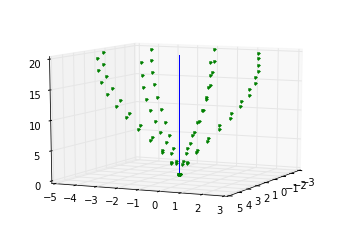

In [41]:
linea=figure()
trompo=linea.add_subplot(1,1,1, projection='3d')
plot(r[:,0],r[:,1],r[:,2])
plot(r1[:,0],r1[:,1],r1[:,2],'.')
trompo.view_init(10,25)
show()